<a href="https://colab.research.google.com/github/heymshri/MachineLeaninginPython/blob/main/StrokeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


import warnings
warnings.filterwarnings('ignore') 

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
data.shape
data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data preparation

In [ ]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
data["stroke"].replace({0:"No", 1:"Yes"}, inplace = True)

In [ ]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#Data Analysis

Percentage of patients with Brain Stroke

In [ ]:
df=data.groupby('stroke').count()['age']
df

stroke
No     4861
Yes     249
Name: age, dtype: int64

In [ ]:
label1=data.groupby('stroke').count()['age'].index
label1

Index(['No', 'Yes'], dtype='object', name='stroke')

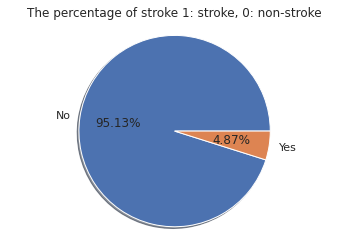

In [ ]:
plt.axis("equal")
plt.pie(df,labels=label1, shadow=True, autopct='%1.2f%%',radius=1.1)
plt.title("The percentage of stroke 1: stroke, 0: non-stroke")
plt.show()

Stroke Patient's Age Distribution

In [ ]:
data1=data[data["stroke"]=='Yes']
data1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


In [ ]:
fig = px.histogram(data1, x= 'age', marginal="box")
fig.show()

In [ ]:
r1=data1.groupby('gender').count()['id']
r1

gender
Female    141
Male      108
Name: id, dtype: int64

Stroke Patient's Age Distribution on Gender Basis

In [ ]:
m_data=data1[data1["gender"]=='Male']
f_data=data1[data1["gender"]=='Female'] 

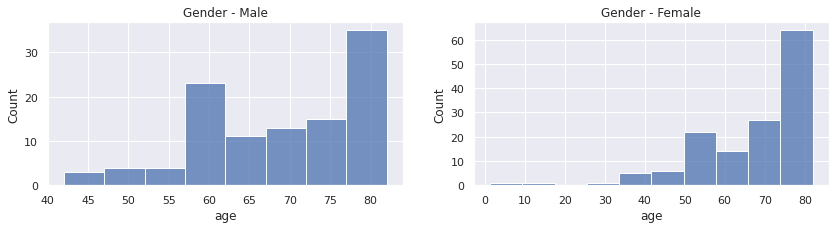

In [ ]:
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
ax1.title.set_text('Gender - Male')
sns.histplot(data=m_data,x="age",ax=ax1,)
sns.histplot(data=f_data,x="age",ax=ax2)
ax2.title.set_text('Gender - Female')

In [ ]:
s_data=data[data["stroke"]=='Yes'] 
n_data=data[data["stroke"]=='No'] 

Hypertension

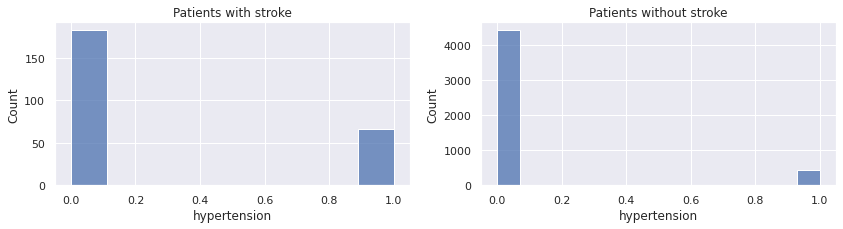

In [ ]:
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
sns.histplot(data=s_data,x="hypertension",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="hypertension",ax=ax2)
ax2.title.set_text('Patients without stroke')

Heart Disease

In [ ]:
figstroke = px.histogram(s_data, x= 'heart_disease', title='Patients with stroke')
figstroke.show()
figwithoutstroke = px.histogram(n_data, x= 'heart_disease', title='Patients without stroke')
figwithoutstroke.show()



Residence Type

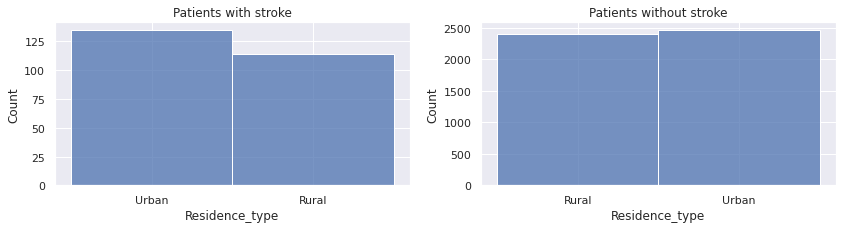

In [ ]:
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(14,3))
sns.histplot(data=s_data,x="Residence_type",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="Residence_type",ax=ax2)
ax2.title.set_text('Patients without stroke')

Worktype

In [ ]:
figwiths = px.histogram(s_data, x= 'work_type', title='Patients with stroke')
figwiths.show()
figwithouts = px.histogram(n_data, x= 'work_type', title='Patients without stroke')
figwithouts.show()

In [ ]:
s_data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


Body Mass Index

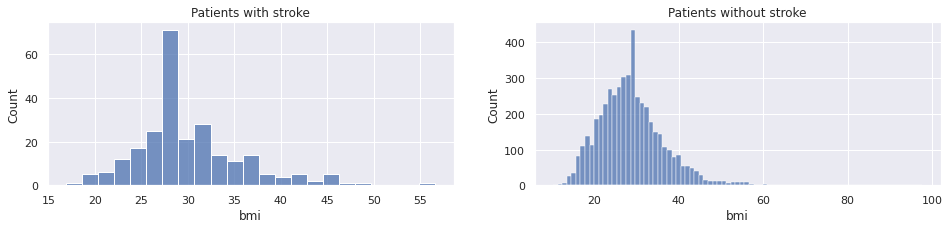

In [ ]:
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="bmi",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="bmi",ax=ax2)
ax2.title.set_text('Patients without stroke')

Smoking Status

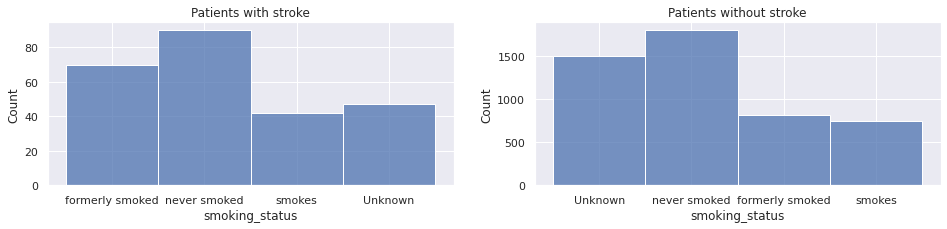

In [ ]:
sns.set_theme(style = 'darkgrid')
fig, ((ax1, ax2)) = plt.subplots(1,2,figsize=(16,3))
sns.histplot(data=s_data,x="smoking_status",ax=ax1)
ax1.title.set_text('Patients with stroke')
sns.histplot(data=n_data,x="smoking_status",ax=ax2)
ax2.title.set_text('Patients without stroke')